In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from IPython.display import display

import os, random

from filterbank import Steerable
from filterbank import *
import cv2

<PIL.Image.Image image mode=L size=1024x1024 at 0x10C3AE410>


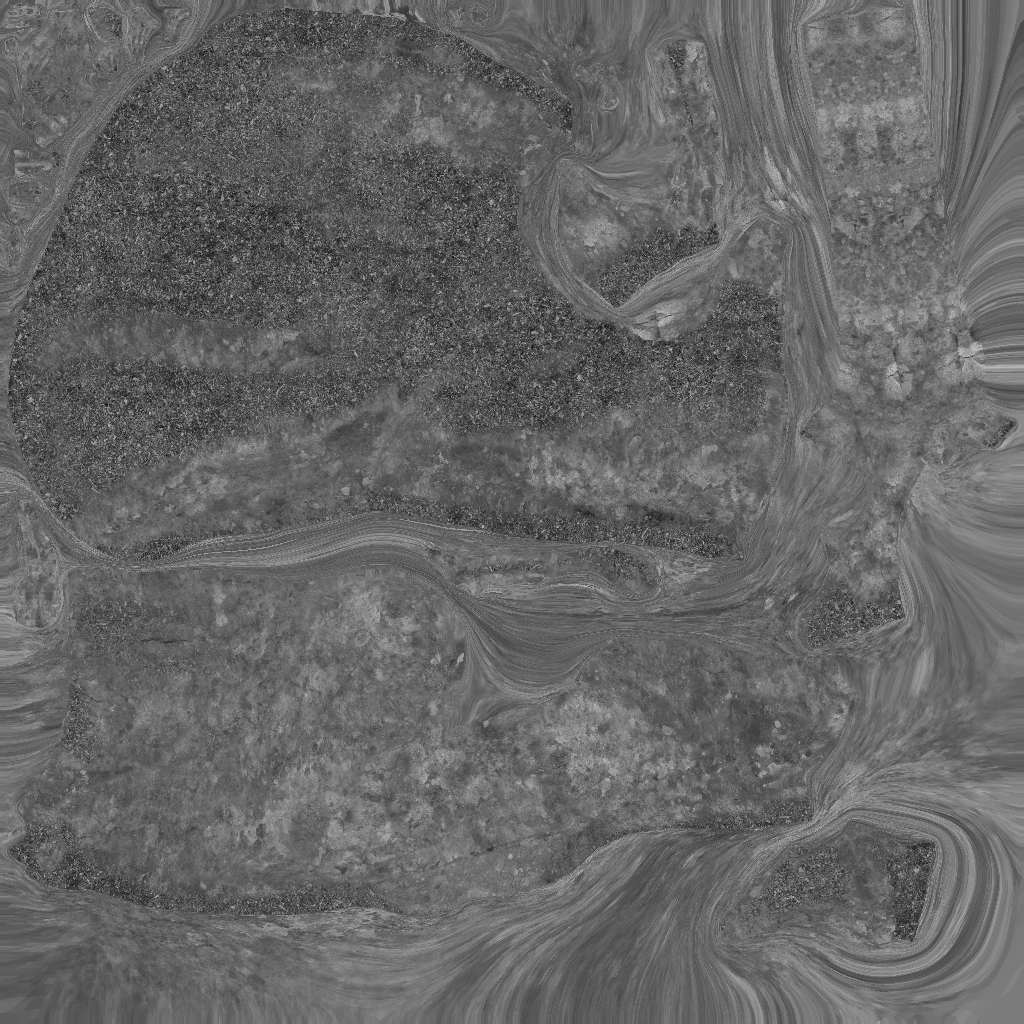

TypeError: slice indices must be integers or None or have an __index__ method

In [5]:
#im = cv2.imread('Data/Rock/Mesh_000000/_Shared/Mesh_000000_HD_BC.tga', cv2.IMREAD_GRAYSCALE)
im = Image.open('Data/Rock/Mesh_000000/_Shared/Mesh_000000_HD_BC.tga')
im = im.convert("L")
print im
display(im)
# Build a complex steerable pyramid 
# with height 5 (including lowpass and highpass)
s = Steerable(5)
coeff = s.buildSCFpyr(np.array(im))

# coeff is an array and subbands can be accessed as follows:
# coeff[0] : highpass
# coeff[1][0], coeff[1][1], coeff[1][2], coeff[1][3] : bandpass of scale 1
# coeff[2][0], coeff[2][1], coeff[2][2], coeff[2][3] : bandpass of scale 2
# ...
# coeff[4]: lowpass. It can also be accessed as coeff[-1]
cv2.imwrite("subbband.png", coeff[1][0].real)

# or visualization of whole decomposition
cv2.imwrite("coeff.png", visualize(coeff))

# reconstruction
out = s.reconSCFpyr(coeff)
cv2.imwrite("recon.png", out)


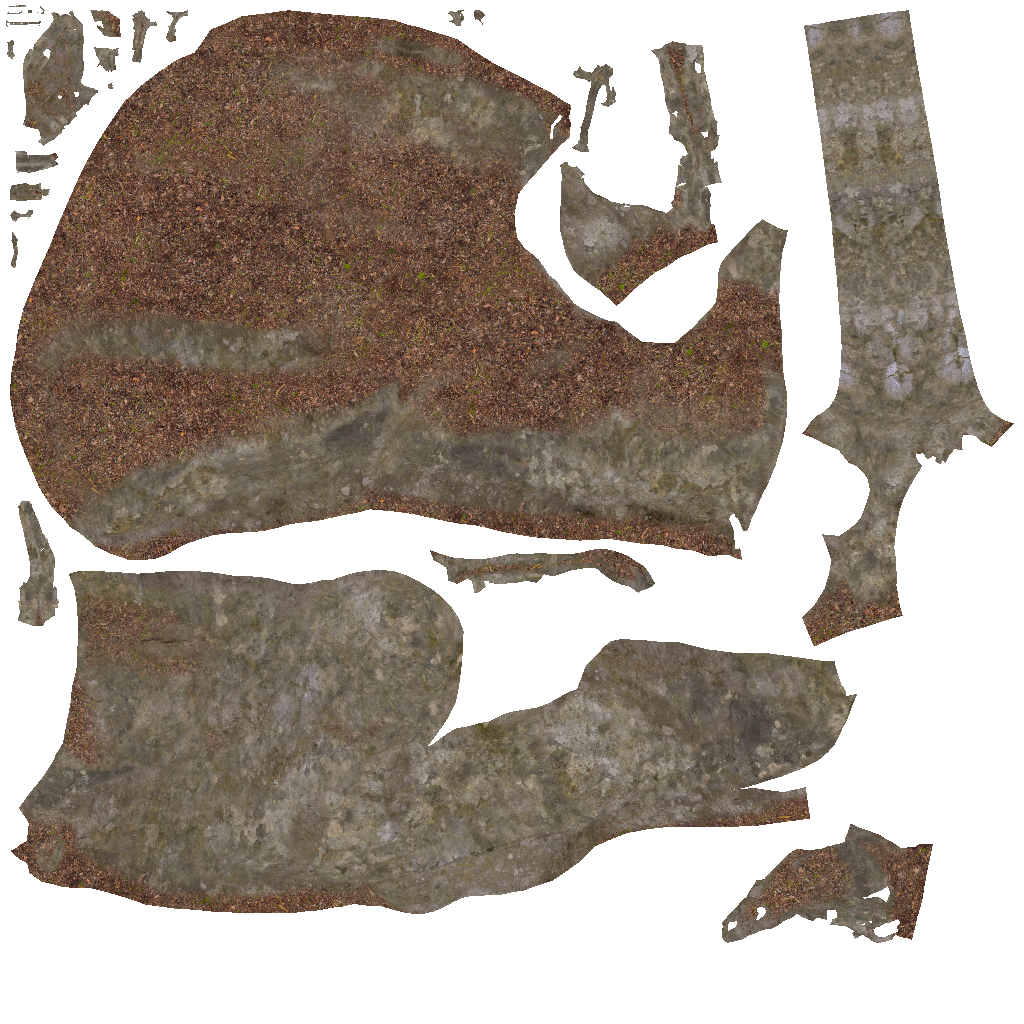

[[[107 100  85   0]
  [110 101  87   0]
  [112 102  85   0]
  ..., 
  [119 108  97   0]
  [120 108  97   0]
  [119 107  97   0]]

 [[108 100  86   0]
  [110 100  87   0]
  [112 101  86   0]
  ..., 
  [119 107  96   0]
  [119 108  97   0]
  [119 107  97   0]]

 [[105  98  87   0]
  [110 101  88   0]
  [113 103  90   0]
  ..., 
  [120 107  97   0]
  [119 107  97   0]
  [119 108  97   0]]

 ..., 
 [[100  92  79   0]
  [101  92  80   0]
  [101  92  80   0]
  ..., 
  [131 122 108   0]
  [130 122 108   0]
  [130 122 108   0]]

 [[101  92  80   0]
  [101  91  80   0]
  [101  91  80   0]
  ..., 
  [131 122 108   0]
  [131 122 108   0]
  [130 122 107   0]]

 [[101  92  79   0]
  [100  92  80   0]
  [101  92  80   0]
  ..., 
  [131 123 108   0]
  [131 122 107   0]
  [131 122 108   0]]]


In [4]:
im = Image.open('Data/Rock/Mesh_000000/_Shared/Mesh_000000_HD_BC.tga')
display(im)
print(np.array(im))